**Load the required libraries and datasets**

In [1]:
# Libraries
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 

In [2]:
# Data
## Successfull appointment data 
seen_df = pd.read_csv("../data/exports/successfull-appointments.csv")

## Post intake data 
df = pd.read_csv("../data/exports/post-intake.csv")
df.head()

,Chartnumber,First post-enrollment service,First post-intake service,Post-intake days,Days btn MHinfusion and Intake,Visits,MH infusions,infusions outside Cambridge,Visits outside Cambridge,Intake Facility City,Patient category
0,1,Intake,TMS,14.0,NaN,49,0,0,0,CAMBRIDGE,before mid-2023
1,2,MH Infusion,NaN,NaN,NaN,8,8,0,0,CAMBRIDGE,before mid-2023
2,9,Intake,TMS,9.0,66.0,68,30,0,0,CAMBRIDGE,before mid-2023
3,6,Intake,MH Infusion,0.0,0.0,16,13,0,0,CAMBRIDGE,before mid-2023
4,12,Intake,NaN,NaN,NaN,1,0,0,0,CAMBRIDGE,before mid-2023


In [3]:
# Convert appointment date to datetime 
seen_df["Date"] = pd.to_datetime(seen_df["Date"])

# Order the dataset by date 
seen_df = seen_df.sort_values(by="Date", ascending=True)
seen_df.reset_index(drop=True, inplace=True)

# Data Analysis

In [4]:
def remove_outliers(df, variable):
    """
    Docstring
    This function will remove the outliers from the variable in the data set
    - Uses the IQR method 
    """
    # Calculate Q1, Q3, and IQR
    Q1 = df[variable].quantile(0.25)  # 25th percentile
    Q3 = df[variable].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data to remove outliers
    df_no_outliers = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]

    return df_no_outliers

Here are the data analysis Ideas

- How the long did it take the patients to receive their first service after intake? This will be compared among the categories, also between Cambridge facilities and other facilities. **Visualization type** boxplots(spread) and bar charts(summary comparison).
- Repeat the above for days between the first MH infusion and intake. 
- How many days did it take to get the succeeding service? Are there any delays that are connected with MH infusion drop? (Delays increasing or reducing rapidly since mid of 2023). 
- Are patients preferring other facilities outside Cambridge after their intake?
- Are there enough campaigns and conversions? This will be determine by the number of intakes over time. 
- How many MH infusions do patients take? Compare by their segments and facility city

**Drill down into specific factors - Remember**


**How the long did it take the patients to receive their first service after intake? This will be compared among the categories, also between Cambridge facilities and other facilities. Visualization type boxplots(spread) and bar charts(summary comparison).**

Text(0.5, 1.0, 'Delay of First Service after Intake(Spread & Distribution)')

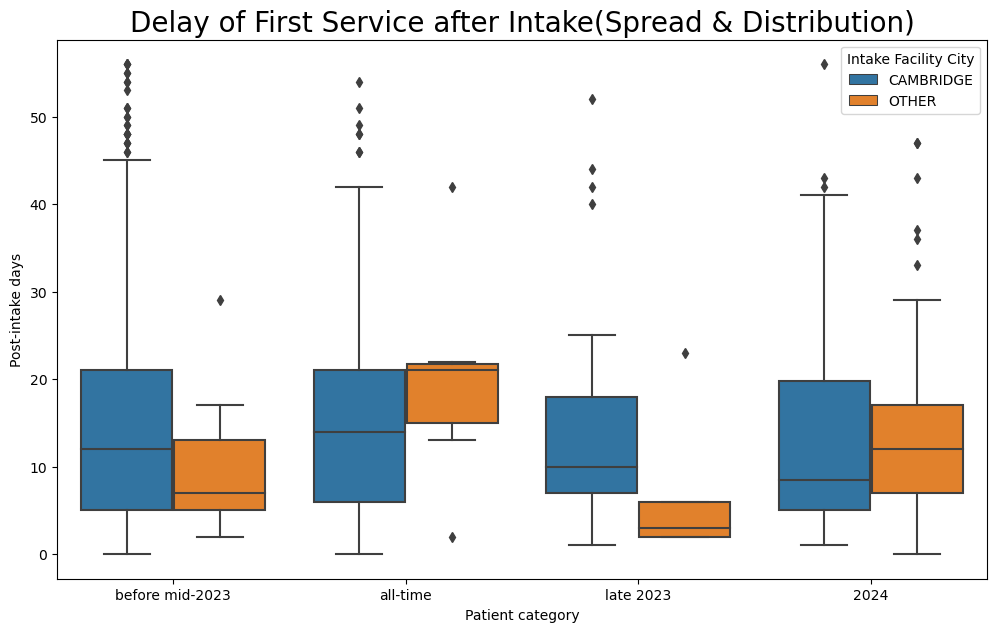

In [10]:
# Post-intake Service Delays
## Select the required columns 
selected_columns = ["Patient category", "Post-intake days", "Intake Facility City"]
select_df = df[selected_columns]

## Remove outliers
select_df = remove_outliers(select_df, "Post-intake days")

## Plotting 
plt.figure(figsize=(12, 7))
sns.boxplot(x="Patient category", y="Post-intake days", 
            hue="Intake Facility City", data=select_df)
plt.title("Delay of First Service after Intake(Spread & Distribution)", fontsize=20)

Text(0.5, 1.0, 'Delay of First Service after intake(Summary Comparison)')

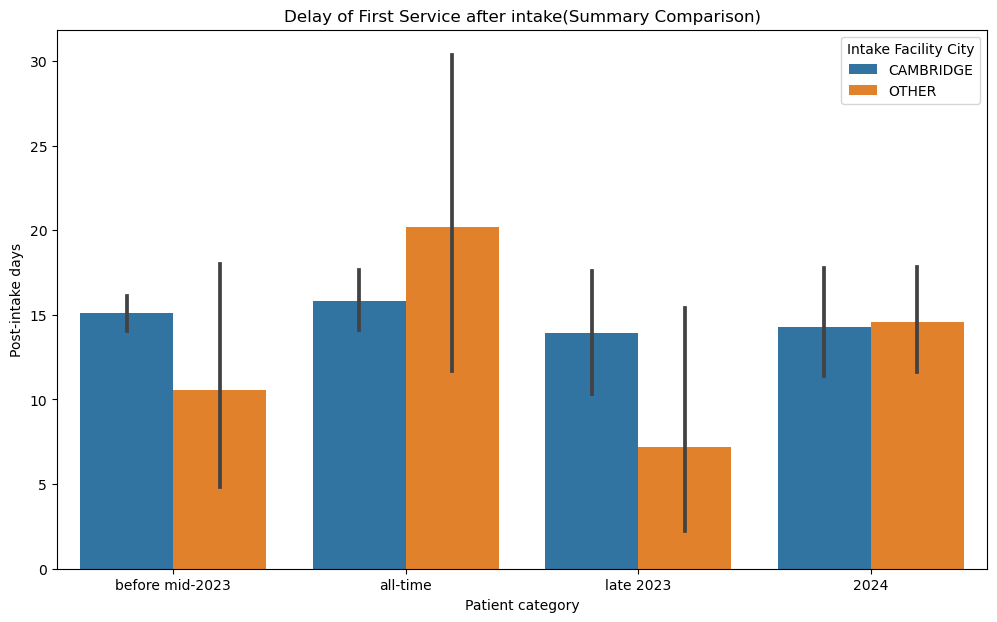

In [12]:
# Now with a bar plot 
plt.figure(figsize=(12, 7))
sns.barplot(x="Patient category", y="Post-intake days", 
            hue="Intake Facility City", data=select_df)
plt.title("Delay of First Service after intake(Summary Comparison)", fontsize=20)

We understand from the first time series analysis, MH infusions started dropping in mid 2023 the situation worsened in 2024. Therefore the findings, insights and recommendations are based on this content

**Results**

- Patients in the late 2023 category had the least post-intake service delays. This might have been attributed due to the short timeframe - patients who existed there for only six months. 
- The 2024 category had a higher delay periods than the before mid-2023 patients(Outside Cambridge). Keep in mind the former category has barely received the services for a year while the later category received services for more than 5 years.
- All time patients in all facilities had delayed most before receiving their first service after intake. 


<span style="color: orange;">**Insight**</span>: Patients need to be given more time after intake before receiving their first service. This may be as a result of 

* insufficient funds that make the patients shy away from the services. This might be improved by discussion from within. Like how you can improve 
* Patients who receive their first service quickly might not have enough time to build trust with the hospital or fully understand the value of MH infusions.
* Those who take longer before the first service may have a stronger commitment to the treatment plan, possibly due to pre-existing relationships or extended education on the importance of the therapy. 
* Patients who take longer to get their first service may have more severe or complex conditions, requiring ongoing attention and more MH infusions.
* Patients with delayed first services might have proactively worked around scheduling constraints, showing a higher level of personal initiative to stay engaged.
* Patients receiving prompt first services may not experience sufficient follow-up or reminders to continue care.(**This is an idea that I will investigate later**- number of follow-ups over time)

<span style="color: orange;">**Recomendations**</span> 

- Will provide recommendations later 

**Repeat the above for days between the first MH infusion and intake.**

Since we have analyzed the time(in days) it took for the patients to receive their first service after intake, now lets focus on MH infusion. The number of days between intake and the first MH infusion will be analyzed as above. 

Text(0.5, 1.0, 'MH Infusion Delays after intake(Spread and Distribution)')

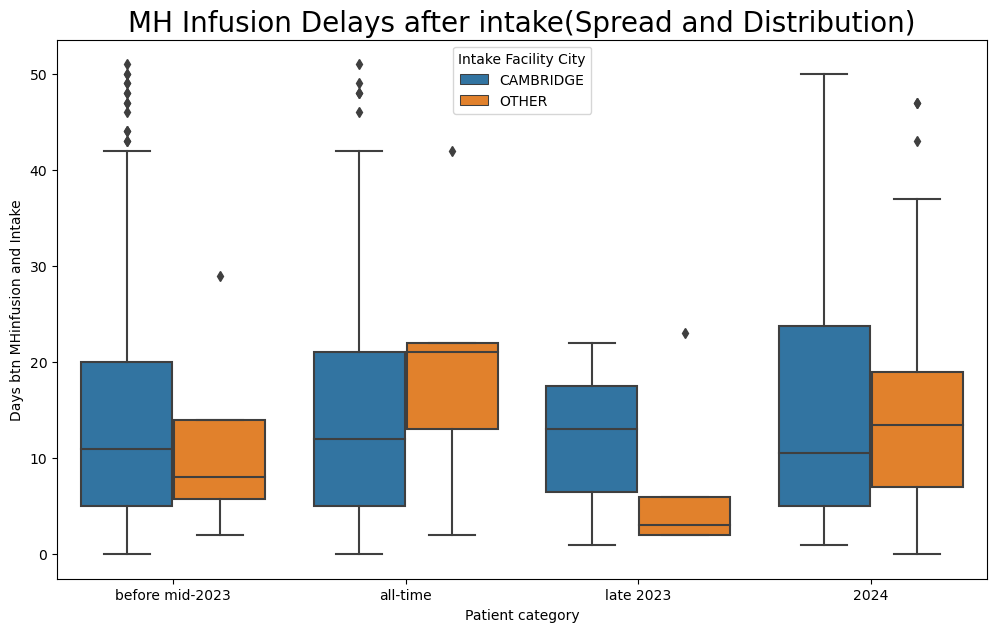

In [14]:
# Post-intake MH infusion Delays
## Select the required columns 
selected_columns = ["Patient category", "Days btn MHinfusion and Intake", "Intake Facility City"]
select_df = df[selected_columns]

## Remove outliers
select_df = remove_outliers(select_df, "Days btn MHinfusion and Intake")

## Plotting 
plt.figure(figsize=(12, 7))
sns.boxplot(x="Patient category", y="Days btn MHinfusion and Intake", 
            hue="Intake Facility City", data=select_df)
plt.title("MH Infusion Delays after intake(Spread and Distribution)", 
         fontsize=20)

Text(0.5, 1.0, 'MH Infusion Delays after intake(Summary Comparison)')

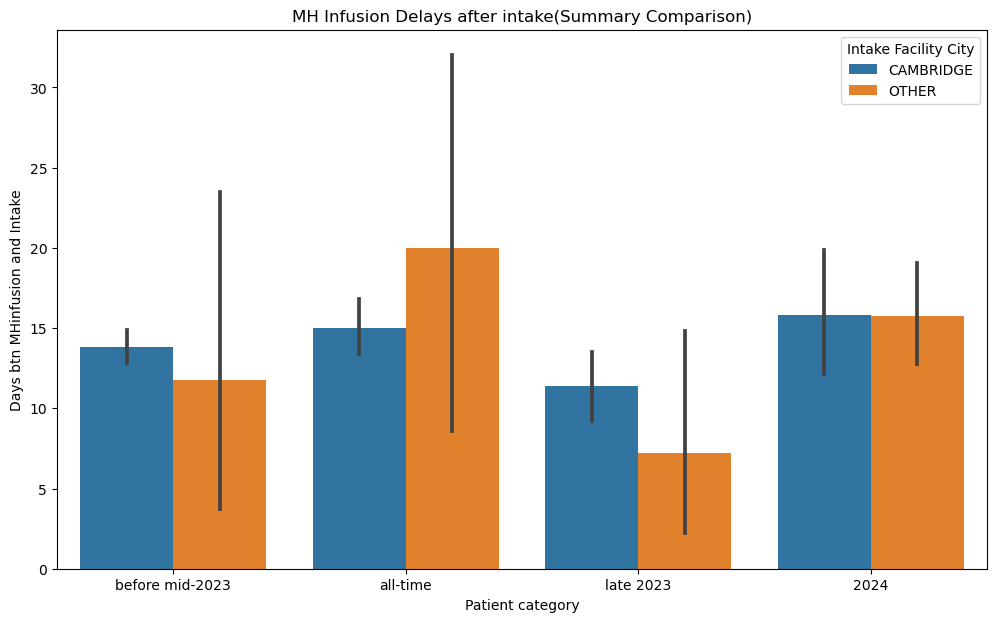

In [15]:
plt.figure(figsize=(12, 7))
sns.barplot(x="Patient category", y="Days btn MHinfusion and Intake", 
            hue="Intake Facility City", data=select_df,
           estimator="mean")
plt.title("MH Infusion Delays after intake(Summary Comparison)")

- Patients that had intake from Cambridge had to wait relatively longer to get their first MH infusion after intake compared to facilities in other cities
- Patients who joined in 2024 waited longer to have their first MH infusion than all time patients and the ones before mid 2023. 
- Patients in late 2023 waited the least. It is practically imposible for them to have longer waiting period since they are the segments that had their first and last service in a span of 6 months (From beginning of July to the end-year).

In Overall, the number of days for patients to get their first MH infusion is almost the same in comparison to their number of days to receive the first service(any). Lets just crosscheck if most of the services the patients received after intake consisted of MH infusion

In [60]:
explode = [0.1,0.15,0.15,0.15,0.15,0.15,0.15,0,0.15, 0]

<Axes: ylabel='count'>

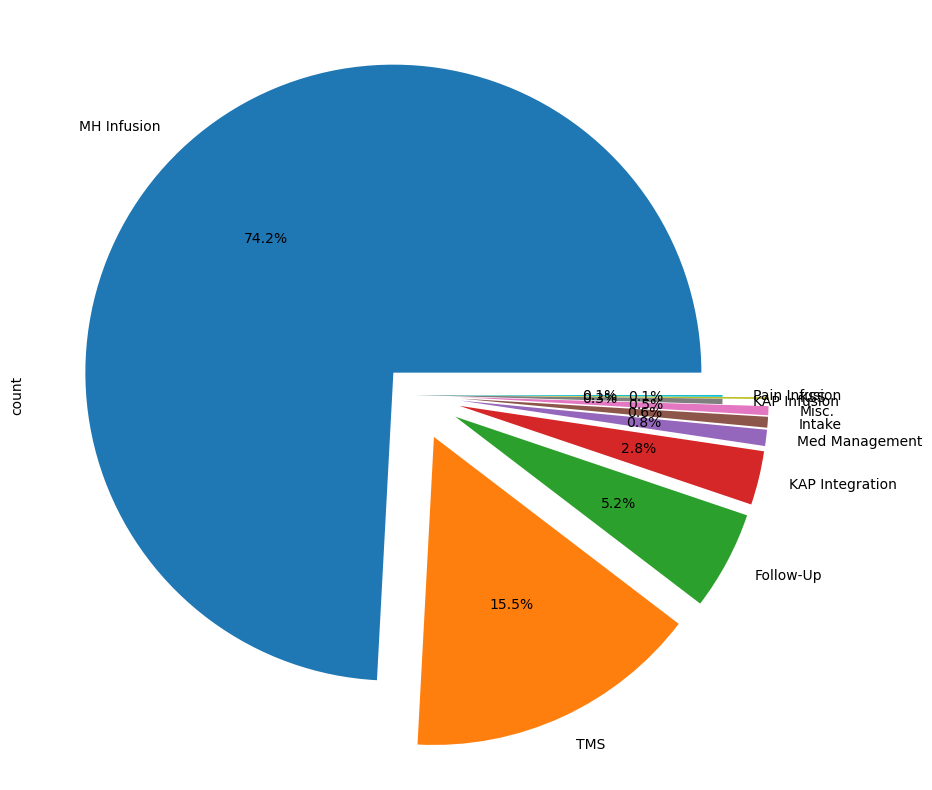

In [62]:
df["First post-intake service"].value_counts().plot(kind="pie", explode=explode,
                                                    autopct='%1.1f%%',figsize=(10, 10))

The chart above explains why the data of first post-intake service and MH infusions are the same. MH infusion comprises of approximately 74% of the total services after intake

**How many days did it take to get the succeeding service? Are there any delays that are connected with MH infusion drop? (Delays increasing or reducing rapidly since mid of 2023).**